# Logistic Regression With Python-1

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

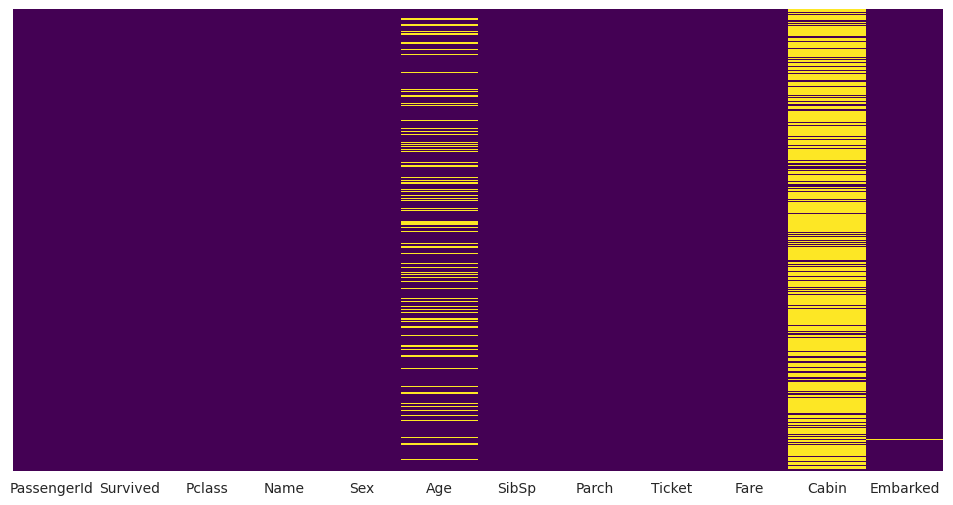

In [6]:
fig=  plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

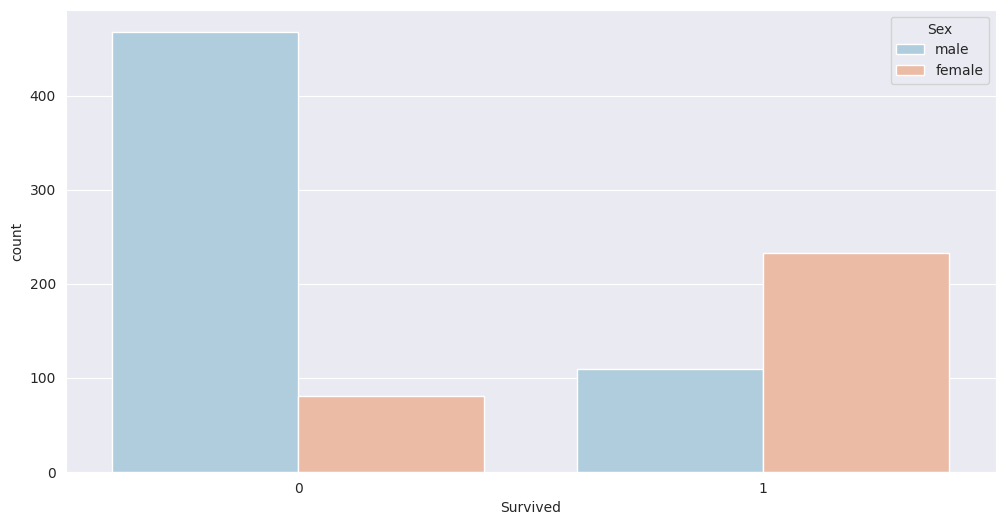

In [7]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='Survived',data=train, hue='Sex', palette='RdBu_r')
plt.show()

**From the above graph, Female are survived most rather than Male**

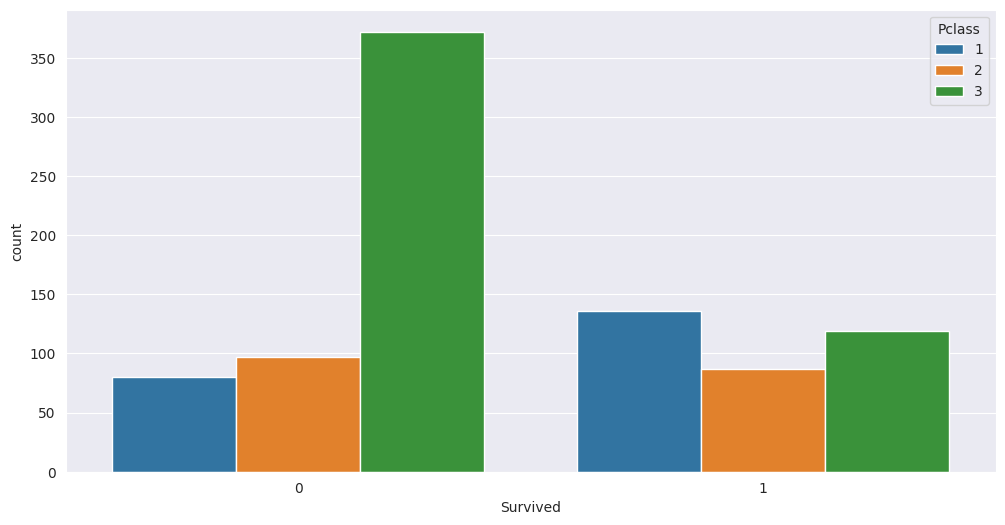

In [8]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='Survived',data=train, hue='Pclass')
plt.show()

**From the abvoe graph, 1st class passenger survived most!**

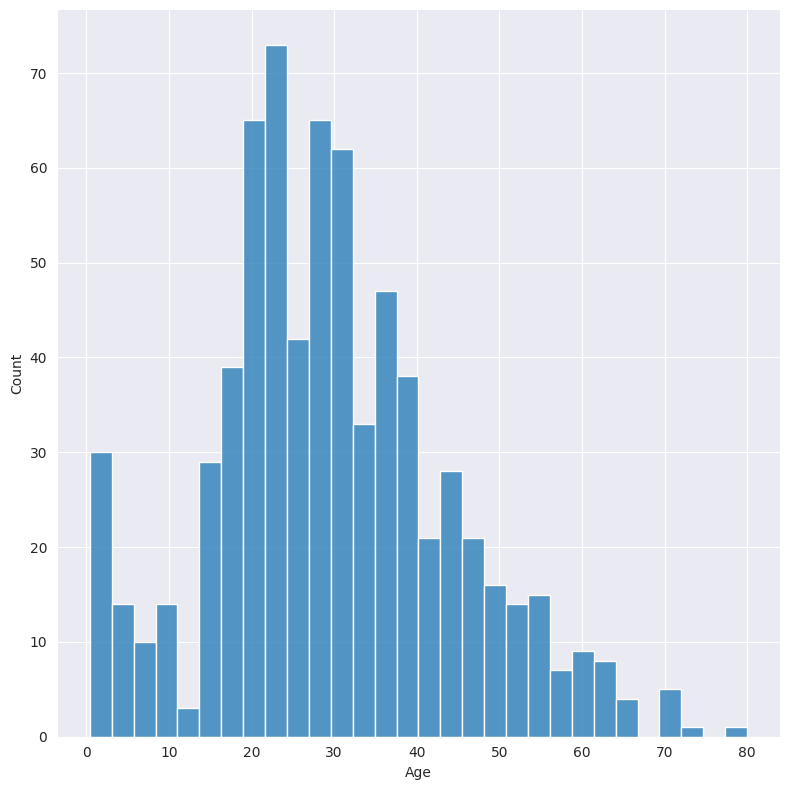

In [9]:
#fig = plt.figure(figsize=(12,6))
sns.displot(train['Age'].dropna(), kde=False, bins=30,height=8)
plt.show()

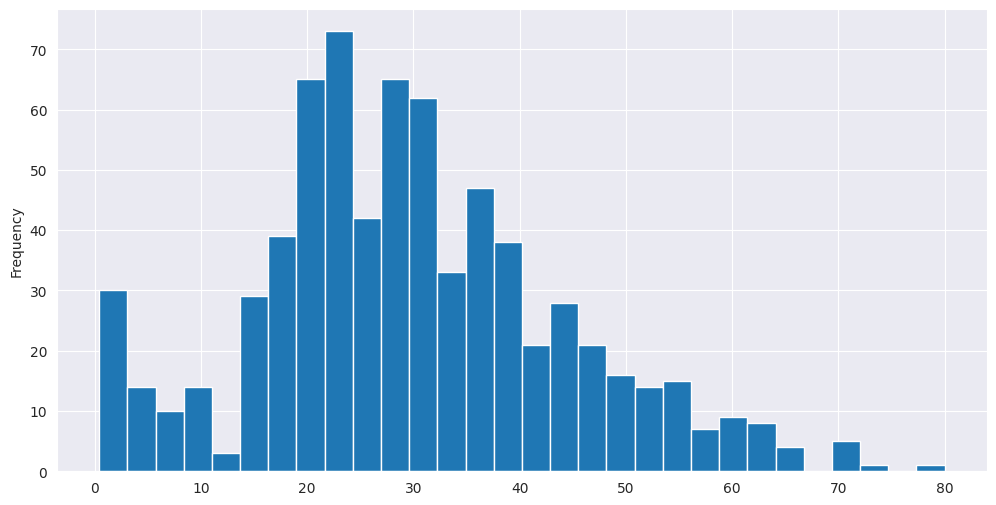

In [10]:
fig = plt.figure(figsize=(12,6))
train['Age'].plot.hist(bins=30)
plt.show()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


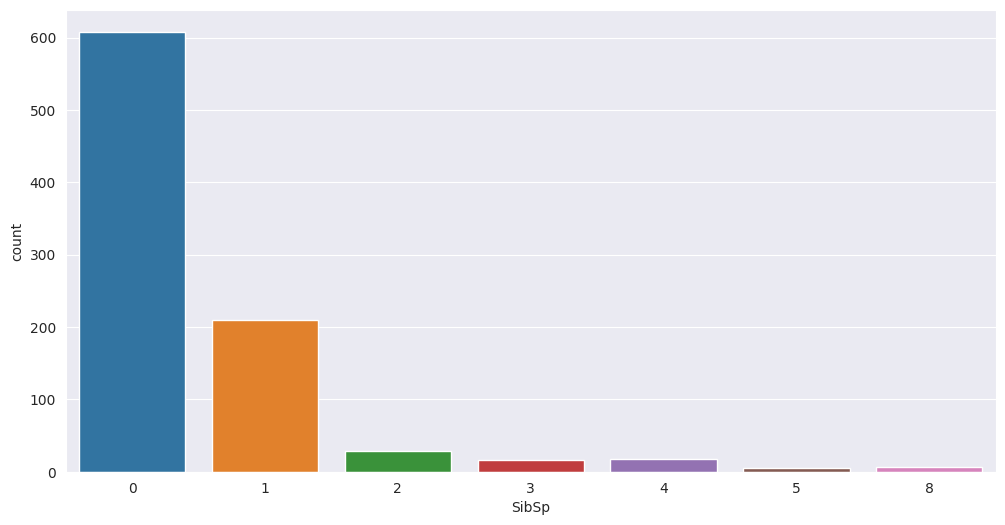

In [12]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='SibSp', data=train)
plt.show()

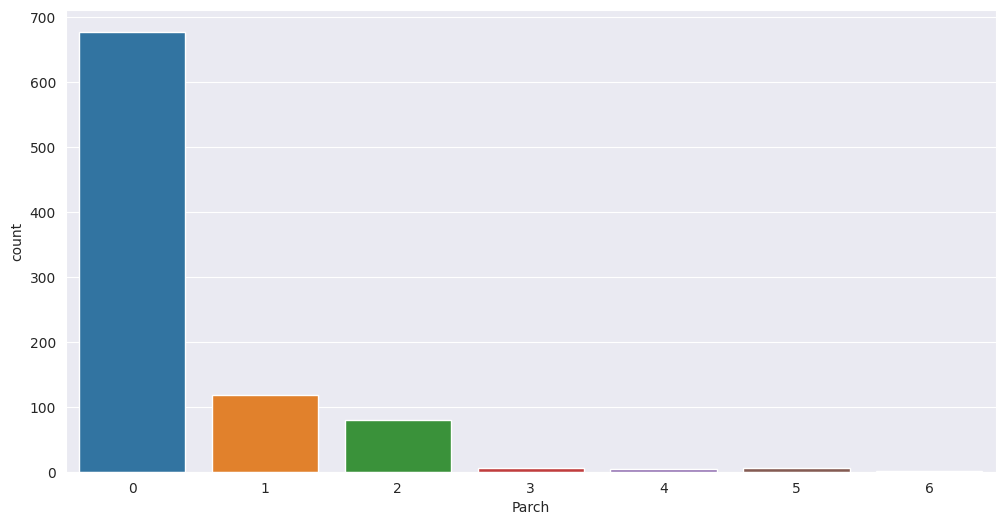

In [13]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='Parch', data=train)
plt.show()

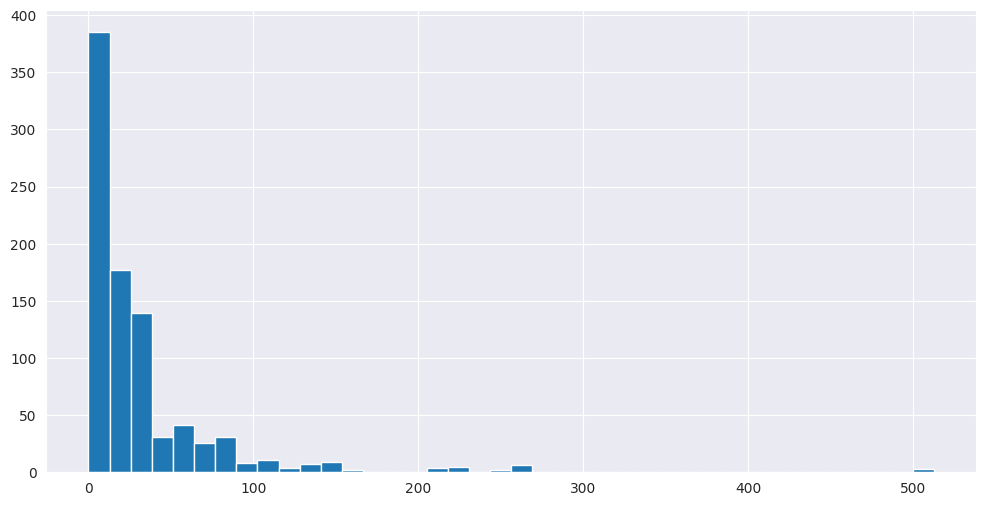

In [14]:
train['Fare'].hist(bins=40, figsize=(12,6))
plt.show()

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

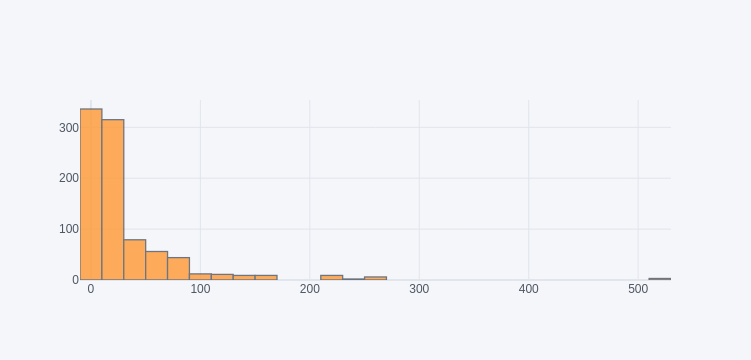

<Figure size 1200x600 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(12,6))
train['Fare'].iplot(kind='hist', bins=50,)
plt.show()

# Logistic Regression With Python-2
**Now we will clean out our data**

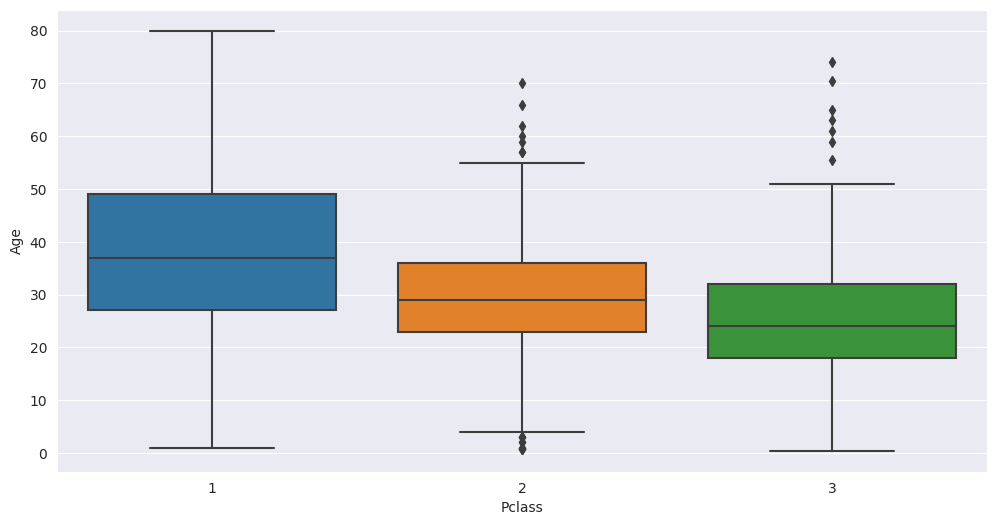

In [18]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

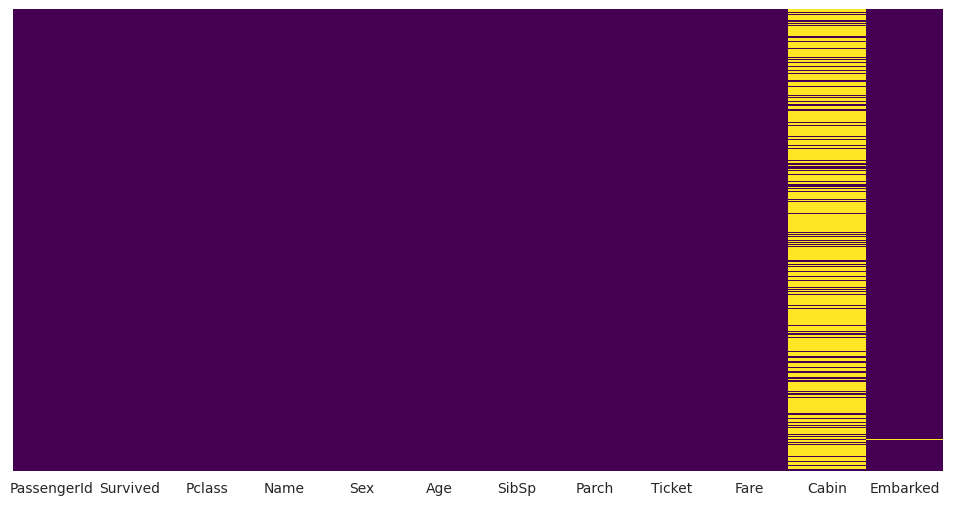

In [21]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [22]:
train.drop('Cabin', axis=1, inplace=True)

In [23]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [24]:
train.dropna(inplace=True) # Drop any missing value

In [25]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

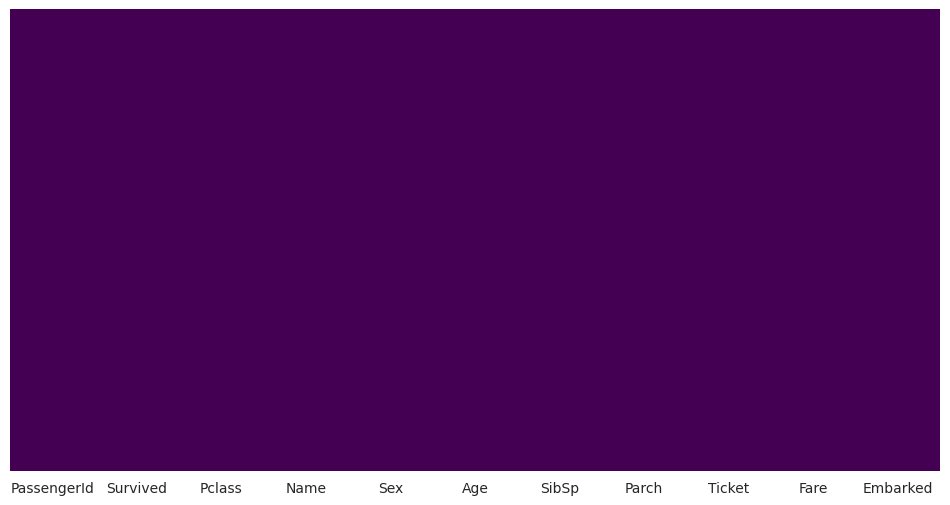

In [26]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [29]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [30]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [31]:
train = pd.concat([train, sex, embark], axis=1)

In [32]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [33]:
train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [34]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [35]:
train.drop('PassengerId', axis=1, inplace=True)

In [36]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

# Logistic Regression With Python-3
**Train and use the model for predict the passenger will survived or not!**

In [38]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
X_train.head()

Pclass   Age  SibSp  Parch    Fare  male  Q  S
807       3  18.0      0      0   7.775     0  0  1
651       2  18.0      0      1  23.000     0  0  1
2         3  26.0      0      0   7.925     0  0  1
690       1  31.0      1      0  57.000     1  0  1
196       3  24.0      0      0   7.750     1  1  0

In [42]:
X_test.head()

Pclass   Age  SibSp  Parch    Fare  male  Q  S
511       3  24.0      0      0    8.05     1  0  1
613       3  24.0      0      0    7.75     1  1  0
615       2  24.0      1      2   65.00     0  0  1
337       1  41.0      0      0  134.50     0  0  0
718       3  24.0      0      0   15.50     1  1  0

In [43]:
y_train.head()

807    0
651    1
2      1
690    1
196    0
Name: Survived, dtype: int64

In [44]:
y_test.head()

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression(max_iter=1000)

In [49]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]])